In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df['stories'].value_counts()

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

In [6]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Text(0, 0.5, 'area')

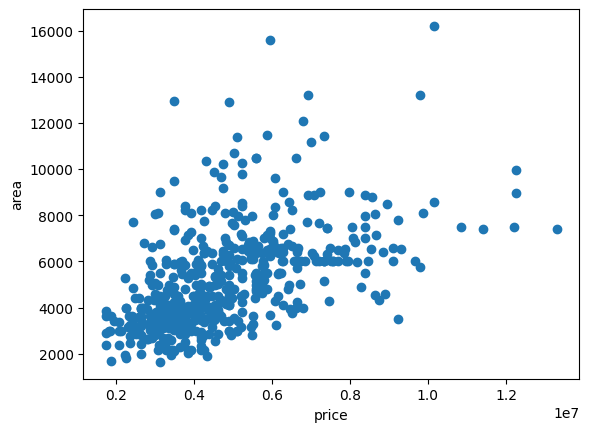

In [7]:
plt.scatter(df['price'], df['area'])
plt.xlabel("price")
plt.ylabel("area")

The relationship between area and price is generally proportional. However, there are some notable outliers, such as small areas around 8000 with high prices and large areas with surprisingly low prices.

<Axes: xlabel='price', ylabel='Count'>

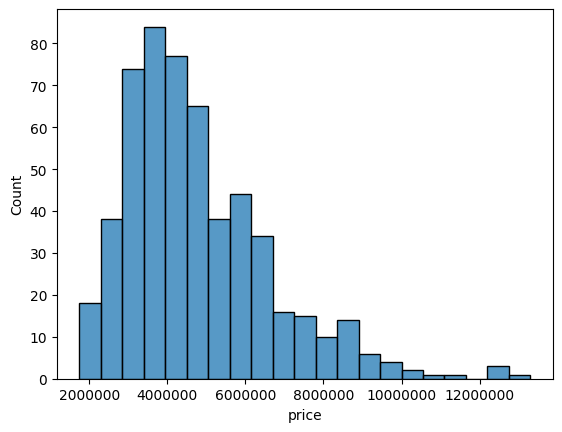

In [8]:
fig = plt.figure()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['price'])


The price distribution is consistent, with only a small number of outliers present (fancy houses, i see) :)

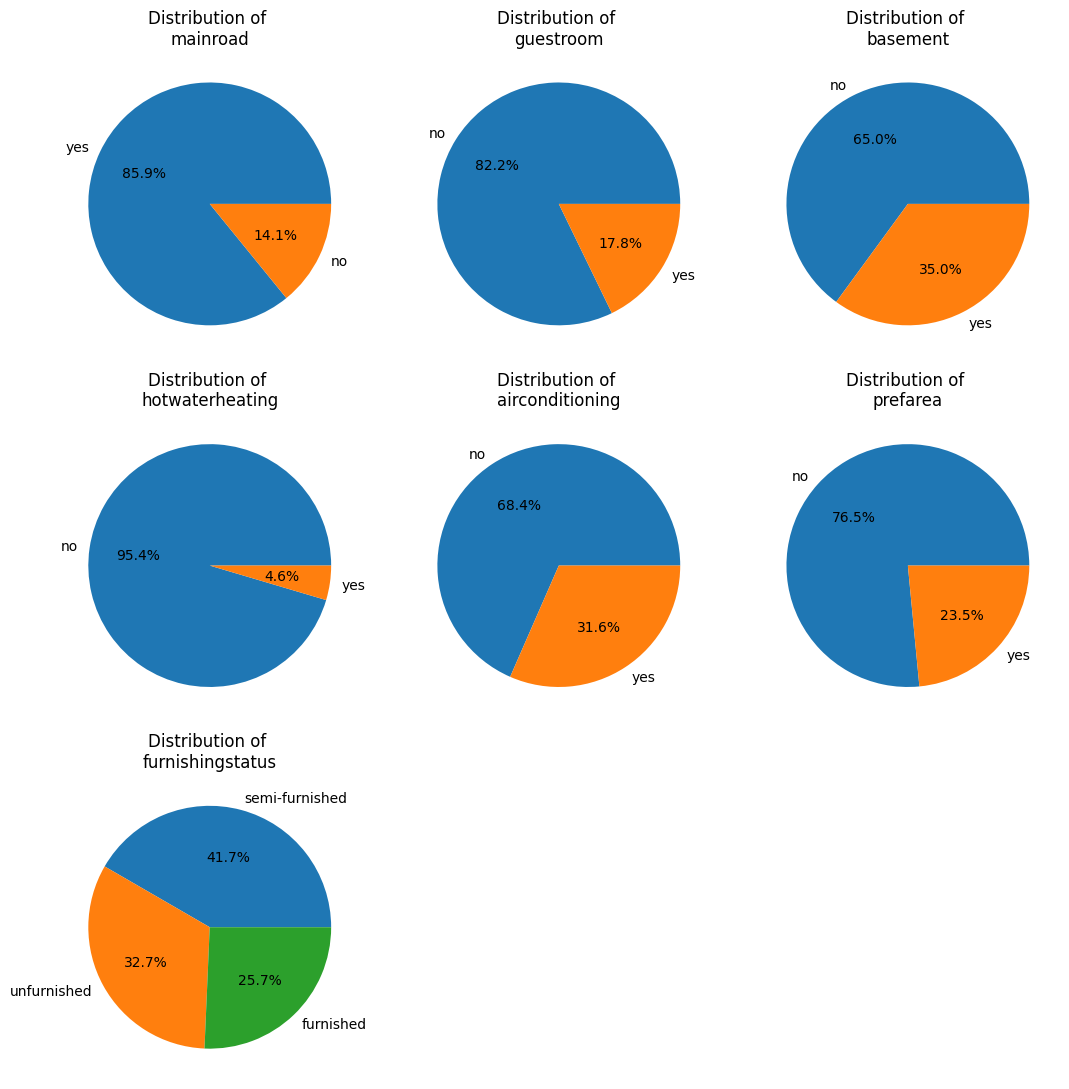

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(11, 11))
axes = axes.flatten()

for idx, col in enumerate(df.select_dtypes(include='object').columns):
    ax = axes[idx]
    data_counts = df[col].value_counts()
    ax.pie(data_counts, autopct='%1.1f%%', labels=data_counts.index)
    ax.set_title(f"Distribution of \n{col}")

for i in range(len(df.select_dtypes(include='object').columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<Axes: xlabel='stories', ylabel='count'>

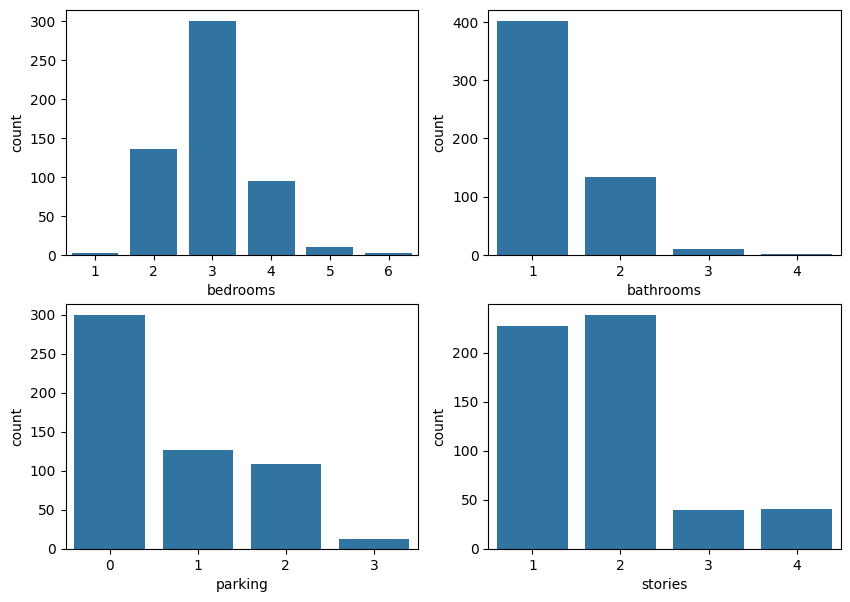

In [10]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,2,1)
sns.countplot(x=df['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(x=df['bathrooms'])
fig.add_subplot(2,2,3)
sns.countplot(x=df['parking'])
fig.add_subplot(2,2,4)
sns.countplot(x=df['stories'])

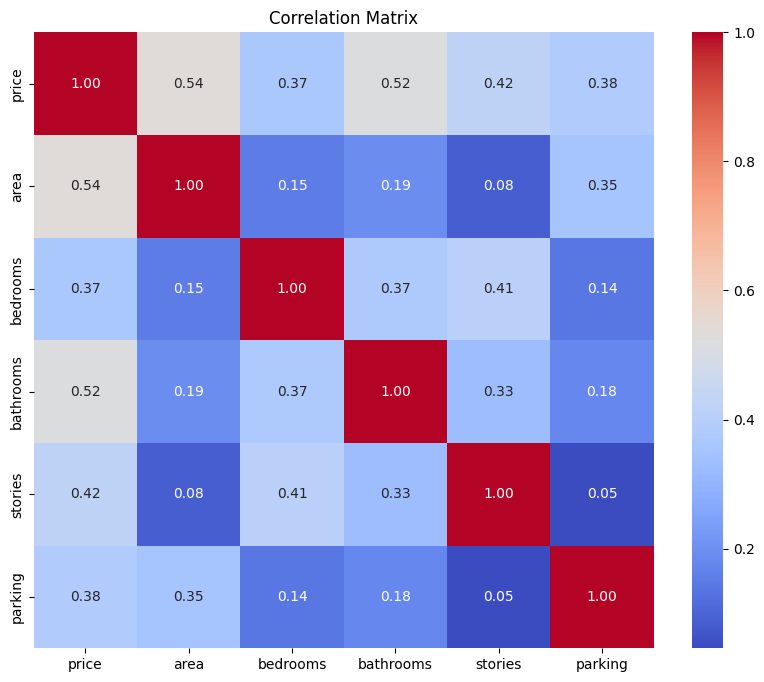

In [11]:
# Define numerical features and subset numeric data
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
numeric_data = df[numerical_features]

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


the corelation matrix shows that area, bedrooms, bathrooms and stories are important features. Having the strongest correlations with house prices. While the correlations are not very strong, they are the most influential.

C:\Users\Cezar\AppData\Local\Temp\ipykernel_6940\2730921259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['furnishingstatus'], y=df['price'],


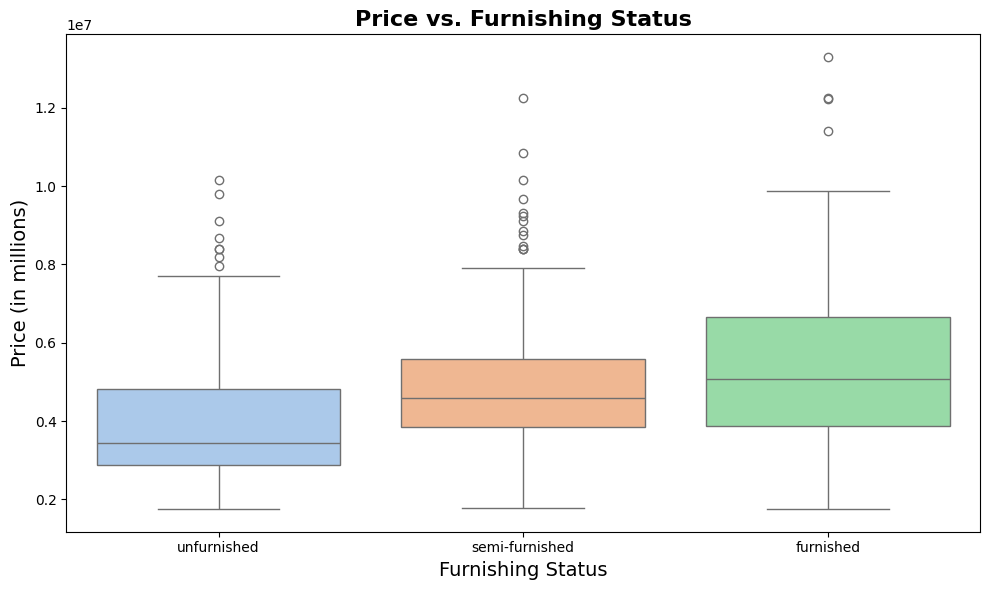

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['furnishingstatus'], y=df['price'], 
            order=['unfurnished', 'semi-furnished', 'furnished'],
            palette='pastel')
plt.title("Price vs. Furnishing Status", fontsize=16, fontweight='bold')
plt.xlabel("Furnishing Status", fontsize=14)
plt.ylabel("Price (in millions)", fontsize=14)
plt.tight_layout()
plt.show()

The boxplot illustrates the relationship between house prices and furnishing status. Furnished homes typically have the highest median price. In contrast, semi-furnished homes show a higher number of outliers, particularly in the upper price range.

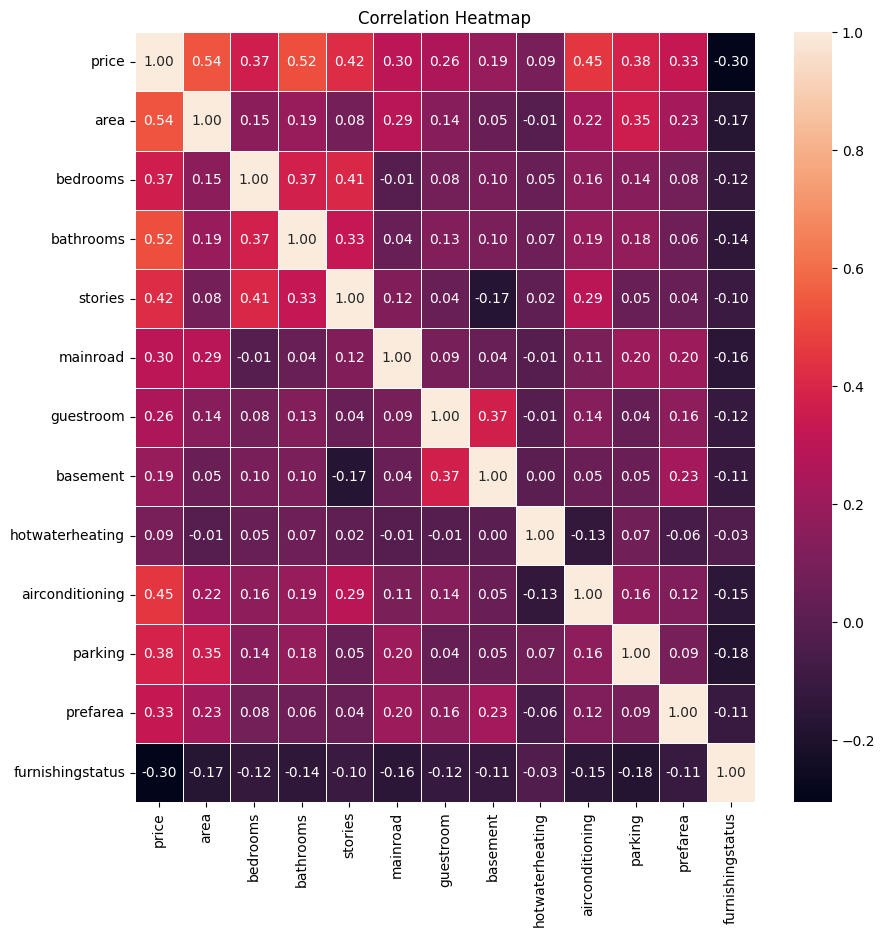

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoding_col = ['furnishingstatus', 'prefarea', 'airconditioning', 'hotwaterheating', 'basement', 'guestroom', 'mainroad']

for col in encoding_col:
    df[col] = encoder.fit_transform(df[col])

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

the features where the distribution is well balanced, the corelation is higher, as seen in the pie charts, hotwaterheating, mainroad and guestroom have a low corelation status. 